# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

**This graph is good becuase it labels each of the categories and presents them in a logical order. Also, the proportions are represented by rectangles and show the percent on top of the section. Where this graph fails is in adhearing to the proportional ink principle. The amount of ink present is not equal to the area of the shown rectangle. For example, 13% has a larger area than 34% meanwhile 28% has no area at all.**

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

**This graph is good becuase it has a title as well as lables for each slice of the cart. Along with the labels it tells the audience what percentage the slice represents. The not so good parts of this graph include the shape and violenation of the proportional ink principle. Since the layers are staggered it makes it very hard to see how much of the circle is represented by the slice. Furthermore, it allows some slices to have the sides showing with additional ink while others do not violating the proportional ink principle.**

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

**This is a good visualization becuase both axis are clearly labeled as a point of interest. There is also a good title that is descriptive and informative. Where this graph faulters is in the principle of propotional ink which is related to the one dimensional guideline. Rectangles should always be used becuase the audience pays more attention to the area then the actual height. Furthermore, it is counter initive to have the y axis opposite of what the audience expects.**

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [2]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [3]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

In [4]:
gss_clean['male_breadwinner'] = gss_clean['male_breadwinner'].astype('category').cat.reorder_categories(['strongly agree','agree','disagree','strongly disagree'])

Text(0.5, 1.0, 'Level of Agree that the Male Should be the Bread Winner')

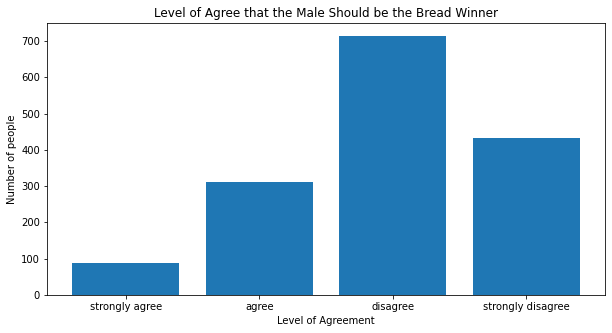

In [5]:
## Matplotlib
mybars = gss_clean['male_breadwinner'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(mybars.index, mybars.values)
plt.xlabel('Level of Agreement')
plt.ylabel('Number of people')
plt.title('Level of Agree that the Male Should be the Bread Winner')

Text(0.5, 1.0, 'Level of Agree that the Male Should be the Bread Winner')

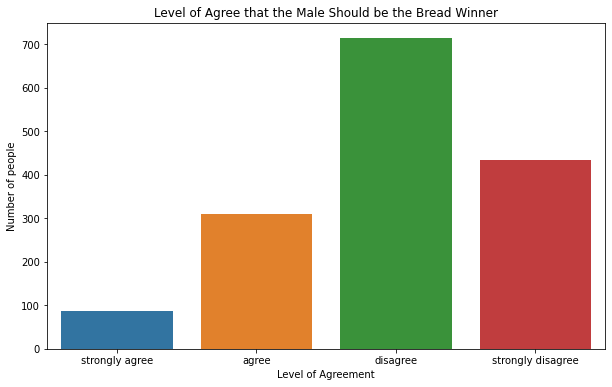

In [6]:
## seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=mybars.index, y=mybars.values)
plt.xlabel('Level of Agreement')
plt.ylabel('Number of people')
plt.title('Level of Agree that the Male Should be the Bread Winner')

Text(0.5, 1.0, 'Level of Agree that the Male Should be the Bread Winner')

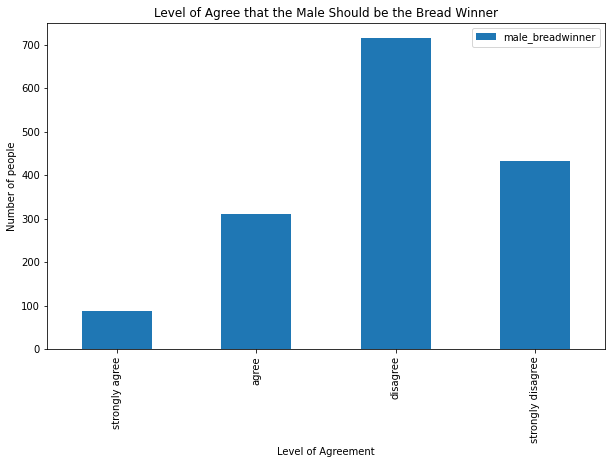

In [7]:
## .plot()
mybars_df = mybars.reset_index()
mybars_df
mybars_df.plot(kind='bar', x='index', y='male_breadwinner',figsize = [10,6])
plt.xlabel('Level of Agreement')
plt.ylabel('Number of people')
plt.title('Level of Agree that the Male Should be the Bread Winner')

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

In [8]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category').cat.reorder_categories(['strongly agree','agree','disagree','strongly disagree'])

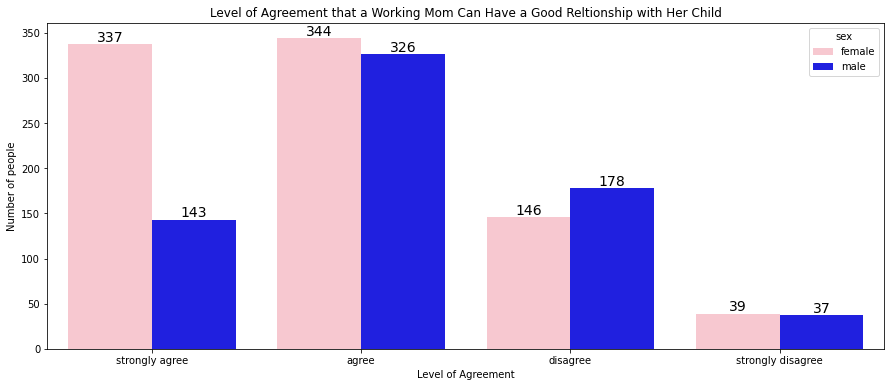

In [9]:
## seaborn
relationship_df_plot = gss_clean.groupby(['sex','relationship']).size()
relationship_df_plot = relationship_df_plot.reset_index()
relationship_df_plot = relationship_df_plot.rename({0:'count'}, axis=1)
relationship_df_plot
plt.figure(figsize=(15, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=relationship_df_plot,palette=['pink','blue'])
plt.xlabel('Level of Agreement')
plt.ylabel('Number of people')
plt.title('Level of Agreement that a Working Mom Can Have a Good Reltionship with Her Child')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

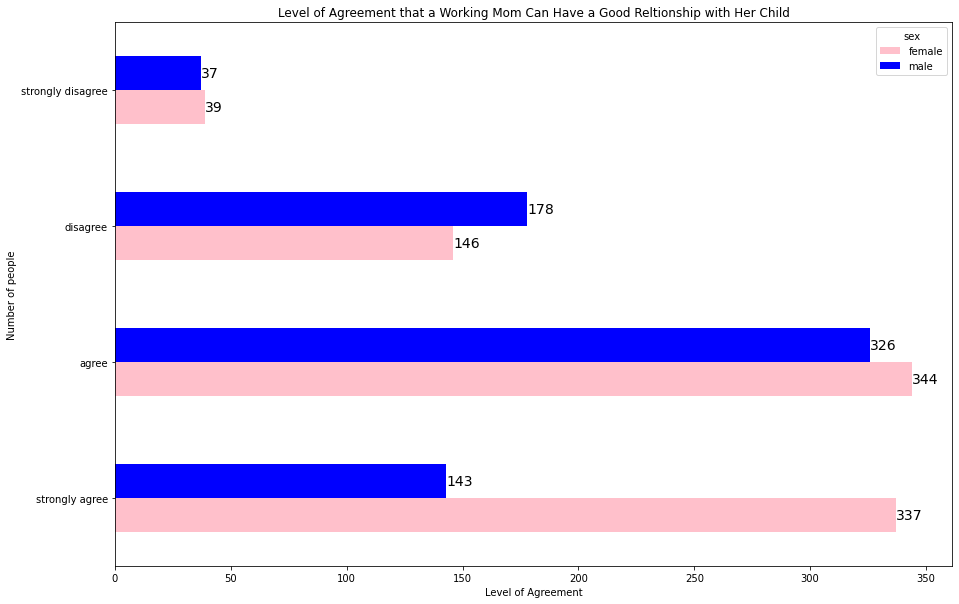

In [10]:
## .plot()
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)
xtab
myplot = xtab.plot(kind='barh', figsize = [15,10],color=['pink','blue'])
plt.xlabel('Level of Agreement')
plt.ylabel('Number of people')
plt.title('Level of Agreement that a Working Mom Can Have a Good Reltionship with Her Child')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

Text(0.5, 0.98, 'Level of Agreement that a Working Mom Can Have a Good Reltionship with Her Child , by Region')

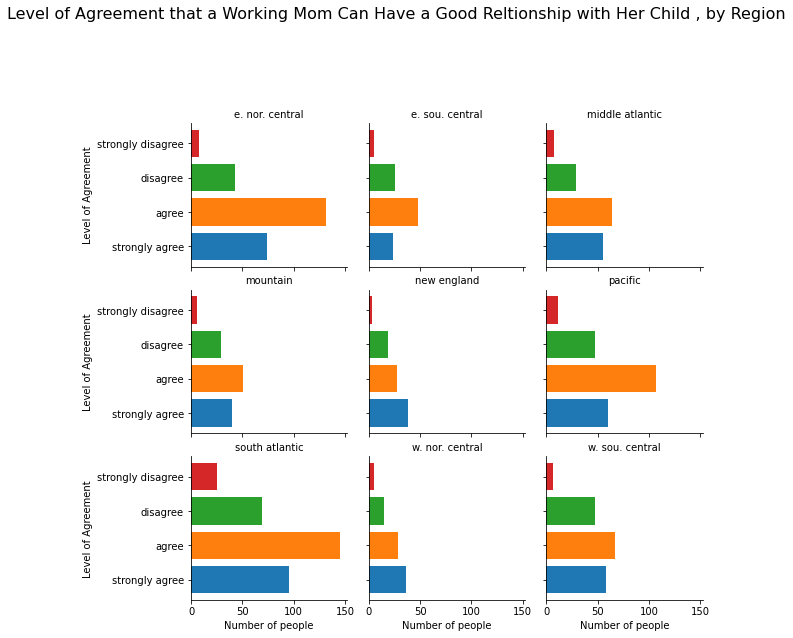

In [11]:
region_plot = gss_clean.groupby(['region', 'relationship']).size().reset_index()
region_plot = region_plot.rename({0:'count'}, axis=1)

g = sns.FacetGrid(region_plot,col = 'region', col_wrap=3, hue = 'relationship')
g.map(plt.barh, 'relationship', 'count')
g.set_titles('{col_name}')
g.set_axis_labels('Number of people', 'Level of Agreement') 
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Level of Agreement that a Working Mom Can Have a Good Reltionship with Her Child , by Region', fontsize=16)

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

(0.0, 80.0)

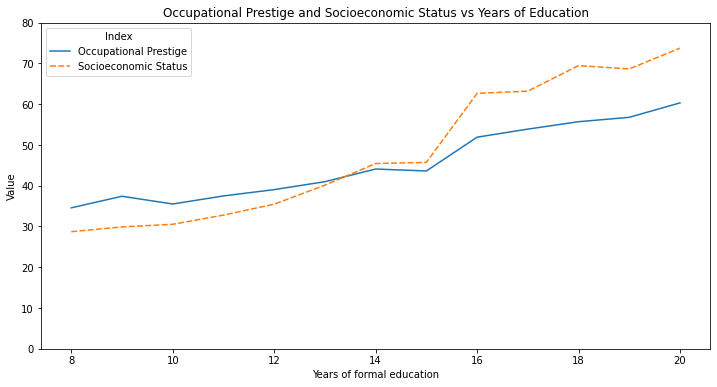

In [20]:
gss_line = gss_clean.query("education>=8.0")
gss_line = gss_line.groupby('education').agg({'job_prestige':'mean',
                                    'socioeconomic_index':'mean'}).reset_index()
gss_line = pd.melt(gss_line, id_vars='education', 
                    value_vars = ['job_prestige','socioeconomic_index'])
gss_line = gss_line.rename({'variable':'Index'}, axis=1)
gss_line['Index'] = gss_line['Index'].map({'socioeconomic_index':'Socioeconomic Status',
                                                     'job_prestige':'Occupational Prestige'})
gss_line

plt.figure(figsize=(12,6))
sns.lineplot(x='education', y='value', 
             hue='Index', style='Index',
             data=gss_line,ci=None)
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Status vs Years of Education')
plt.ylim(0,80)

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

Text(0.5, 1.0, 'Correlation Personal Economic Indicators')

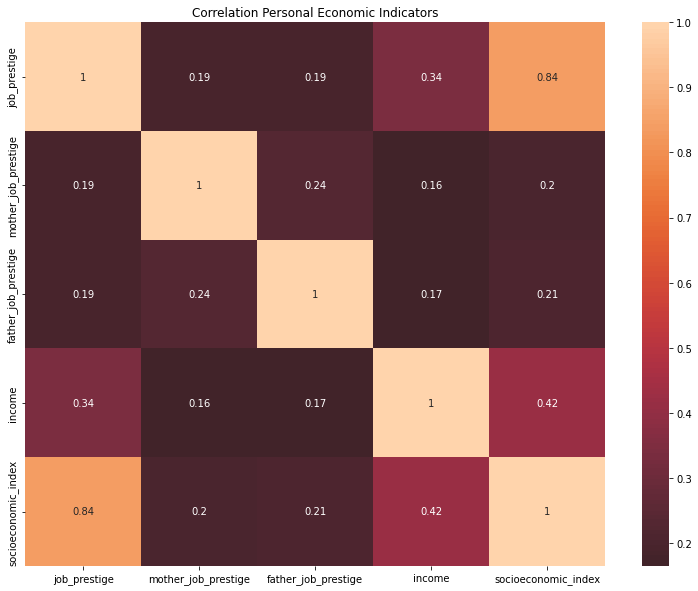

In [13]:
my_corr = gss_clean[['job_prestige', 'mother_job_prestige', 'father_job_prestige','income',
       'socioeconomic_index']].corr()
plt.figure(figsize = (13,10))
sns.heatmap(my_corr,center=0,annot=True)
plt.title("Correlation Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

Text(0.5, 0.98, 'Income vs. Prestige by Education')

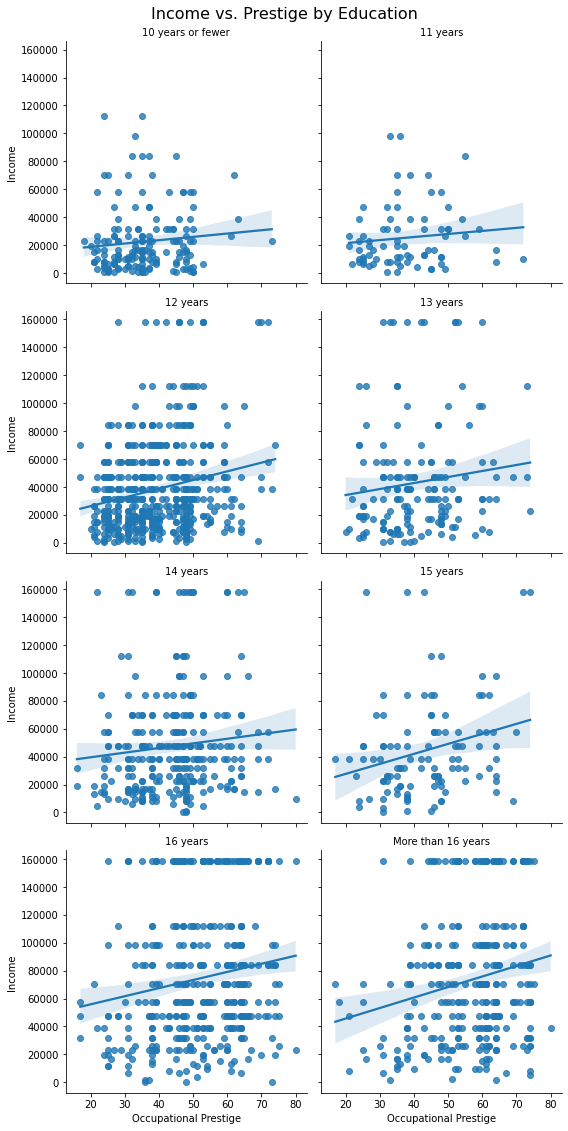

In [14]:
gss_clean['education'] = gss_clean['education'].dropna().astype(int)
gss_clean['EducationGroup'] = pd.cut(gss_clean.education,
                         bins = [0, 10, 11, 12, 13, 14, 15, 16, 20],
                         labels = ("10 years or fewer", "11 years", "12 years", "13 years", "14 years", "15 years","16 years", "More than 16 years"), right = True)
g = sns.FacetGrid(gss_clean, col = 'EducationGroup', height=4, aspect=1,col_wrap=2)
g.map(sns.regplot, 'job_prestige', 'income')
g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'Income') 
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

Text(0.5, 1.0, 'Distributions of Income for Males vs Females')

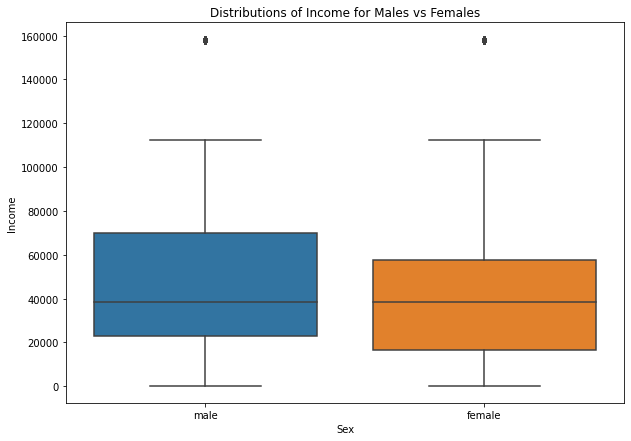

In [17]:
male_income = gss_clean.query("sex=='male'")[['sex','income']].dropna()
female_income = gss_clean.query("sex=='female'")[['sex','income']].dropna()
income = pd.concat([male_income,female_income],ignore_index=True,join='inner')
plt.figure(figsize = (10,7))
sns.boxplot(x = 'sex', y = 'income', data = income)
plt.xlabel("Sex")
plt.ylabel("Income")
plt.title("Distributions of Income for Males vs Females")

**The figure above shows that the median income of men and women is about equal. It also shows that the rich men are richer than the rich women and the poor women are poorer than the poor men. While the medians are equal the disparity in bounds of the 25th and 75th quartile is evidence that men have higher incomes than women.**

In [32]:
male_income_pre = gss_clean.query("sex=='male'")[['sex','income','job_prestige']].dropna()
female_income_pre = gss_clean.query("sex=='female'")[['sex','income','job_prestige']].dropna()
income_pre = pd.concat([male_income_pre,female_income_pre],ignore_index=True,join='inner')
income_pre_corr = income_pre.groupby('sex').corr()

Text(0.5, 1.0, 'Distributions of Income for Males vs Females')

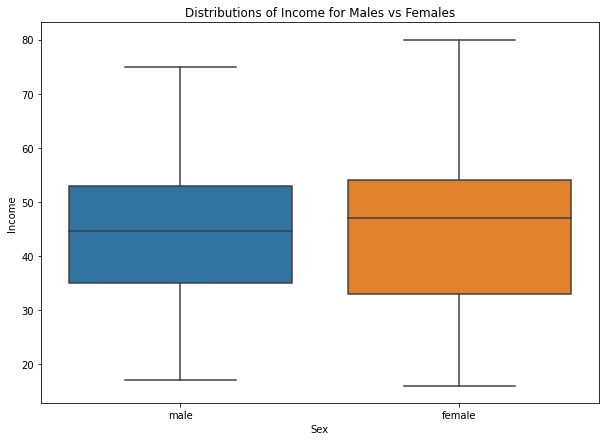

In [34]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'sex', y = 'job_prestige', data = income_pre)
plt.xlabel("Sex")
plt.ylabel("Income")
plt.title("Distributions of Income for Males vs Females")

**Men do not have a higher occupational prestige than women. The median of job prestige for women is higher than men and 75th precentile is higher as well, therefore the difference in income cannot be due to men having jobs with higher prestige.**